In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from src.services.uci_service.rice_data import RiceData
#from src.plotter import Plotter
from src.solvers.model import LinearRegression
from src.solvers.model import PreProcessing
from src.solvers.bootstrap import Bootstrap
#from src.plotter import ConfidanceInterval

In [25]:
## importando a base de dados
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


In [26]:
data = RiceData().getFeatures()

X = data[['Area', 'Perimeter']]
y = data[['Minor_Axis_Length']]

count     3810.000000
mean     12667.727559
std       1732.367706
min       7551.000000
25%      11370.500000
50%      12421.500000
75%      13950.000000
max      18913.000000
Name: Area, dtype: float64

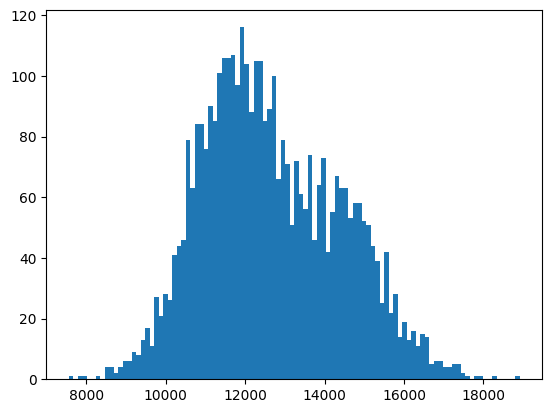

In [27]:
plt.hist(X['Area'], bins=100)
X['Area'].describe()

count     3810.000000
mean     12667.727559
std       1732.367706
min       7551.000000
25%      11370.500000
50%      12421.500000
75%      13950.000000
max      18913.000000
Name: Area, dtype: float64

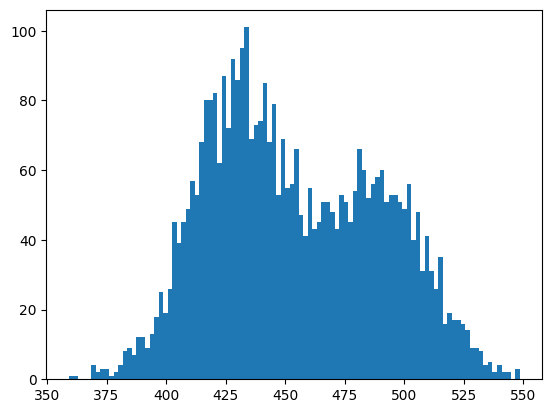

In [28]:
# Major axis distribution
plt.hist(X['Perimeter'], bins=100)
X['Area'].describe()

,Minor_Axis_Length
count,3810.000000
mean,86.313750
std,5.729817
min,59.532406
25%,82.731695
50%,86.434647
75%,90.143677
max,107.542450


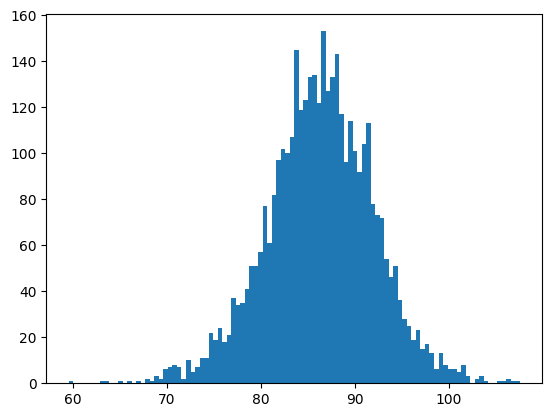

In [29]:
plt.hist(y, bins=100)
y.describe()

In [30]:
build_matrix = PreProcessing().preprocessing(X)
build_matrix.shape

(3810, 3)

In [31]:
estimator = LinearRegression()

bootstraps = Bootstrap(build_matrix,y).calculate_bootstrap(boots=9000, estimator=estimator)

bootstraps.shape

#coefs 

w0 = bootstraps[:,0]
w1 = bootstraps[:,1]
w2 = bootstraps[:,2]

In [32]:
print('w0: ',w0)
print('w1: ',w1)
print('w2: ',w2)

w0:  [[118.24859452]
 [118.74255143]
 [119.89770641]
 ...
 [119.63189521]
 [118.54272105]
 [119.22912121]]
w1:  [[0.00900903]
 [0.00902042]
 [0.00907381]
 ...
 [0.00918004]
 [0.00898141]
 [0.00903905]]
w2:  [[-0.32154138]
 [-0.32298746]
 [-0.32692276]
 ...
 [-0.32935877]
 [-0.32128246]
 [-0.32452816]]


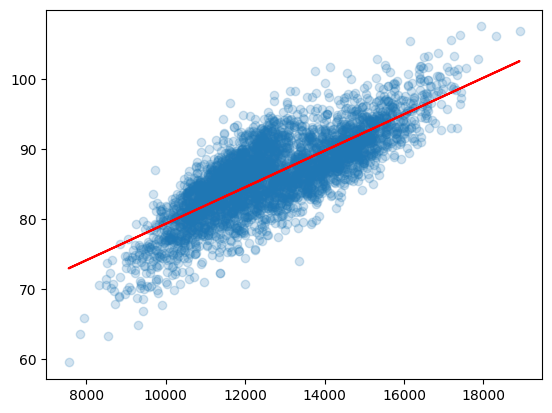

In [33]:
y = np.array(data[['Minor_Axis_Length']])
x1 = build_matrix[:,1]

x1_build_matrix = PreProcessing().preprocessing(x1)
x1_predict = LinearRegression().predict(x1_build_matrix, y)



plt.scatter(x=x1,y=y, alpha=.20)
plt.plot(x1, x1_predict, color='red')


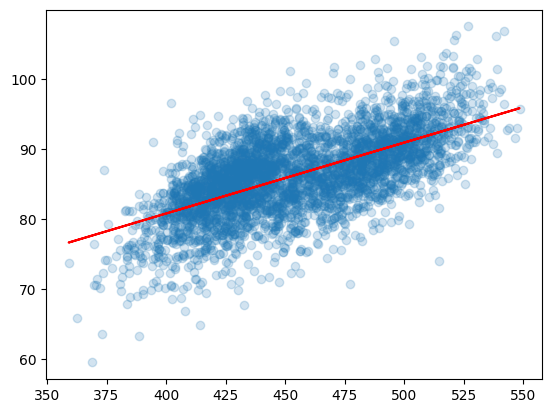

In [34]:
x2 = build_matrix[:,2]

x2_build_matrix = PreProcessing().preprocessing(x2)
x2_predict = LinearRegression().predict(x2_build_matrix, y)



plt.scatter(x=x2,y=y, alpha=.20)
plt.plot(x2, x2_predict, color='red')


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   1.,   2.,
          1.,   1.,   3.,   0.,   0.,   1.,   3.,   1.,   1.,   5.,   2.,
          5.,   6.,  10.,   7.,   5.,   4.,   9.,  10.,   9.,  15.,  10.,
          7.,  19.,  10.,  14.,  12.,  15.,  22.,  23.,  23.,  18.,  31.,
         23.,  29.,  33.,  35.,  31.,  29.,  46.,  50.,  63.,  50.,  48.,
         65.,  54.,  60.,  51.,  76.,  76.,  75.,  95.,  89., 100.,  96.,
        108., 105., 102., 115., 138.,  99., 129., 130., 128., 122., 131.,
        122., 144., 140., 135., 123., 142., 130., 146., 146., 161., 133.,
        135., 171., 119., 124., 157., 174., 144., 151., 152., 135., 129.,
        136., 141., 139., 138., 141., 128., 124., 102., 127.,  98.,  87.,
         91.,  83.,  95.,  79.,  72.,  94.,  82.,  68.,  75.,  68.,  56.,
         55.,  70.,  54.,  41.,  27., 

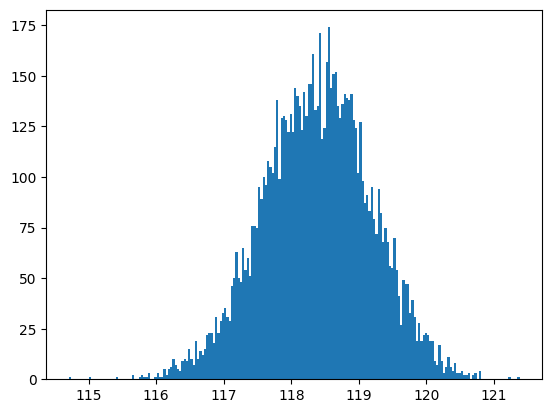

In [35]:
plt.hist(w0, bins=200)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   1.,   3.,   1.,   2.,   4.,   2.,
          2.,   3.,   4.,   2.,   1.,   4.,   0.,   3.,   5.,   5.,   2.,
          6.,   3.,   6.,  12.,   5.,   9.,   9.,   6.,   7.,  19.,   7.,
         10.,  17.,  16.,  16.,  20.,  18.,  17.,  28.,  17.,  32.,  23.,
         20.,  27.,  24.,  23.,  34.,  32.,  36.,  36.,  45.,  45.,  60.,
         49.,  47.,  58.,  55.,  62.,  45.,  69.,  68.,  81.,  71.,  81.,
         89.,  98.,  93.,  87.,  96.,  96.,  96.,  93., 110., 102., 109.,
        102., 101., 124., 105., 105., 134., 130., 110., 136., 119., 112.,
        147., 131., 126., 133., 133., 142., 145., 126., 134., 129., 162.,
        126., 116., 124., 129., 120., 121., 125., 118., 115., 118.,  96.,
        109.,  91., 114., 100., 103.,  84.,  78.,  92.,  98., 108.,  84.,
         83.,  87.,  81.,  74.,  60.,  71.,  43.,  60.,  52.,  44.,  44.,
         45.,  44.,  40.,  45.,  26., 

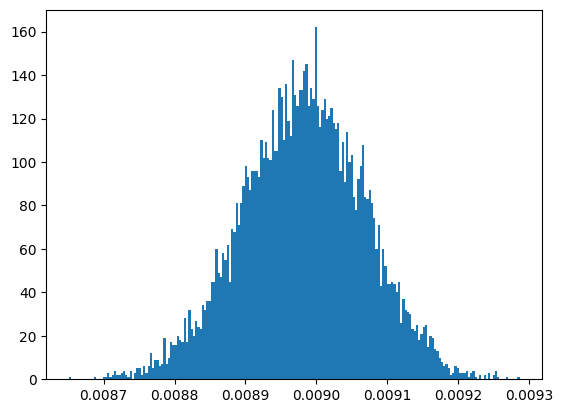

In [36]:
plt.hist(w1, bins=200)


(array([  1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   2.,   1.,   1.,   2.,   0.,   0.,   0.,   1.,   3.,   1.,
          3.,   3.,   5.,   4.,   8.,   4.,   5.,   4.,   5.,   5.,   7.,
          7.,   8.,   5.,  10.,  14.,  12.,  16.,  21.,  12.,  15.,  27.,
          9.,  30.,  25.,  33.,  29.,  26.,  29.,  34.,  25.,  29.,  38.,
         44.,  47.,  41.,  54.,  59.,  59.,  66.,  54.,  59.,  65.,  62.,
         90.,  58.,  70.,  94.,  80.,  94., 101.,  91.,  92.,  74., 110.,
        101., 101.,  96., 102., 112., 112., 113., 117., 132., 132., 116.,
        134., 128., 128., 130., 159., 122., 131., 114., 139., 123., 133.,
        129., 135., 128., 128., 118., 135., 108., 114., 106., 138., 110.,
        107., 102., 124., 113., 107., 115., 117.,  84.,  86.,  87., 103.,
         81.,  81.,  80.,  74.,  90.,  83.,  75.,  54.,  80.,  57.,  52.,
         70.,  49.,  55.,  47.,  50.,  39.,  29.,  39.,  40.,  28.,  25.,
         35.,  30.,  29.,  29.,  24., 

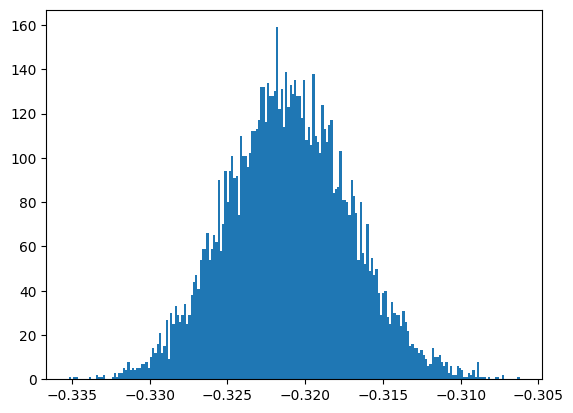

In [37]:
plt.hist(w2, bins=200)

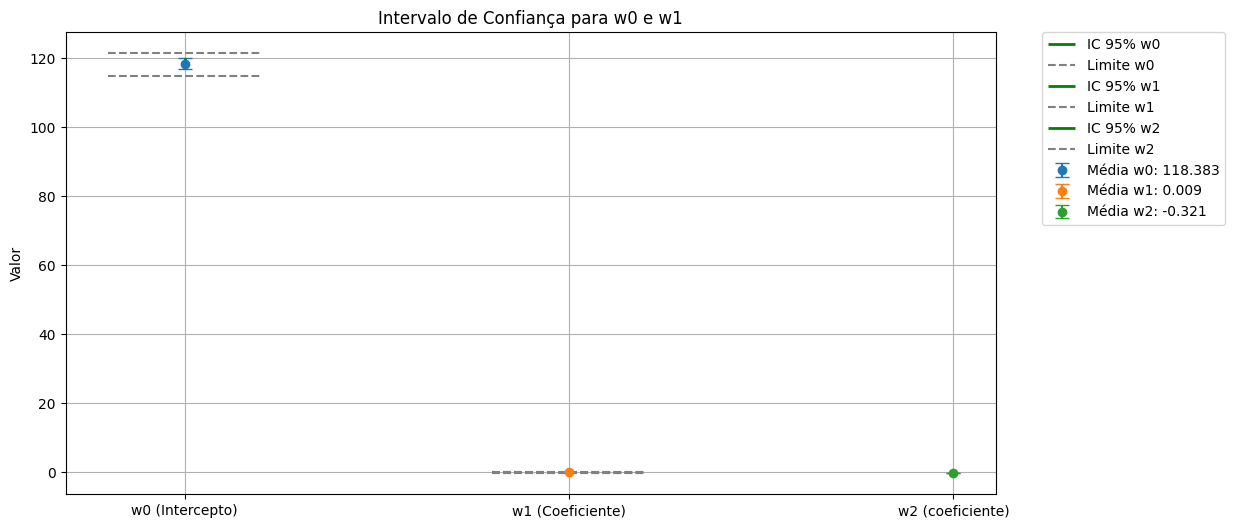

In [38]:

w0_min, w0_max = np.min(w0), np.max(w0)
w1_min, w1_max = np.min(w1), np.max(w1)
w2_min, w2_max = np.min(w2), np.max(w2)


conf_interval_w0 = np.percentile(w0, [2.5, 97.5])
conf_interval_w1 = np.percentile(w1, [2.5, 97.5])
conf_interval_w2 = np.percentile(w2, [2.5, 97.5])

# Plotando os intervalos de confiança para w0 e w1
plt.figure(figsize=(12, 6))

# Adicionando barras de erro para w0
plt.errorbar(0, np.mean(w0), yerr=np.array([[np.mean(w0) - conf_interval_w0[0]], [conf_interval_w0[1] - np.mean(w0)]]),
             fmt='o', capsize=5, label=f'Média w0: {np.mean(w0):.3f}')
plt.vlines(0, conf_interval_w0[0], conf_interval_w0[1], color='green', linestyle='-', linewidth=2, label='IC 95% w0')
plt.hlines([w0_min, w0_max], xmin=-0.2, xmax=0.2, colors='gray', linestyles='--', label='Limite w0')

# Adicionando barras de erro para w1
plt.errorbar(1, np.mean(w1), yerr=np.array([[np.mean(w1) - conf_interval_w1[0]], [conf_interval_w1[1] - np.mean(w1)]]),
             fmt='o', capsize=5, label=f'Média w1: {np.mean(w1):.3f}')
plt.vlines(1, conf_interval_w1[0], conf_interval_w1[1], color='green', linestyle='-', linewidth=2, label='IC 95% w1')
plt.hlines([w1_min, w1_max], xmin=0.8, xmax=1.2, colors='gray', linestyles='--', label='Limite w1')


plt.errorbar(2, np.mean(w2), yerr=np.array([[np.mean(w2) - conf_interval_w2[0]], [conf_interval_w2[1] - np.mean(w2)]]),
             fmt='o', capsize=5, label=f'Média w2: {np.mean(w2):.3f}')
plt.vlines(2, conf_interval_w2[0], conf_interval_w2[1], color='green', linestyle='-', linewidth=2, label='IC 95% w2')
plt.hlines([w2_min, w2_max], xmin=0.8, xmax=1.2, colors='gray', linestyles='--', label='Limite w2')



# Configurações adicionais do gráfico
plt.xticks([0, 1, 2], ['w0 (Intercepto)', 'w1 (Coeficiente)', 'w2 (coeficiente)'])
plt.ylabel('Valor')
plt.title('Intervalo de Confiança para w0 e w1')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)

# Exibindo o gráfico
plt.show()


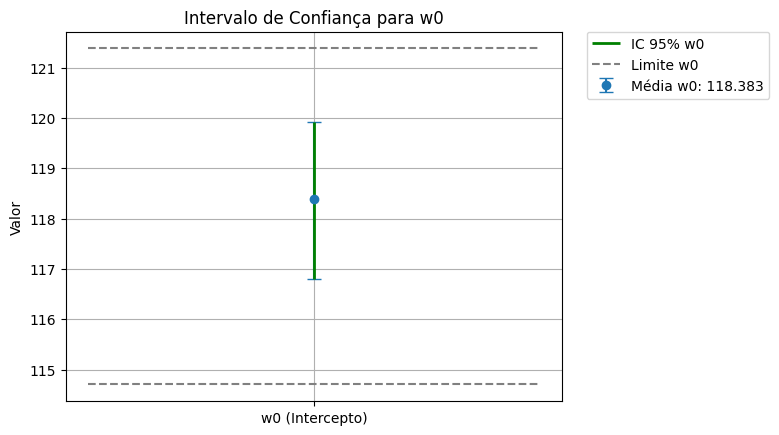

In [40]:
plt.errorbar(0, np.mean(w0), yerr=np.array([[np.mean(w0) - conf_interval_w0[0]], [conf_interval_w0[1] - np.mean(w0)]]),
             fmt='o', capsize=5, label=f'Média w0: {np.mean(w0):.3f}')
plt.vlines(0, conf_interval_w0[0], conf_interval_w0[1], color='green', linestyle='-', linewidth=2, label='IC 95% w0')
plt.hlines([w0_min, w0_max], xmin=-0.2, xmax=0.2, colors='gray', linestyles='--', label='Limite w0')

plt.xticks([0], ['w0 (Intercepto)'])
plt.ylabel('Valor')
plt.title('Intervalo de Confiança para w0')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)



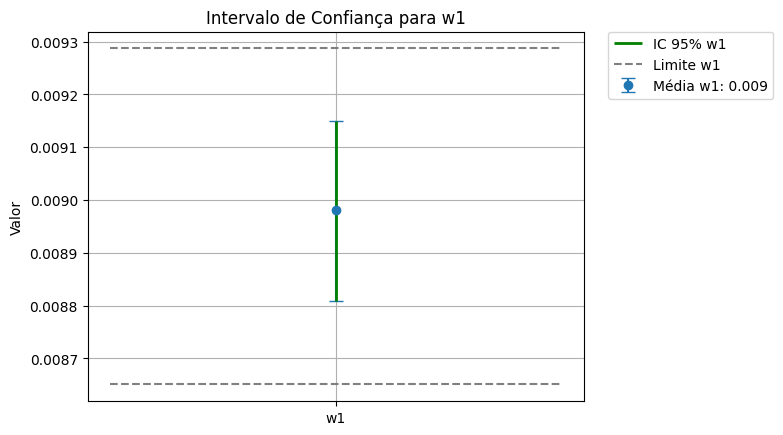

In [41]:
plt.errorbar(1, np.mean(w1), yerr=np.array([[np.mean(w1) - conf_interval_w1[0]], [conf_interval_w1[1] - np.mean(w1)]]),
             fmt='o', capsize=5, label=f'Média w1: {np.mean(w1):.3f}')
plt.vlines(1, conf_interval_w1[0], conf_interval_w1[1], color='green', linestyle='-', linewidth=2, label='IC 95% w1')
plt.hlines([w1_min, w1_max], xmin=0.8, xmax=1.2, colors='gray', linestyles='--', label='Limite w1')

plt.xticks([1], ['w1'])
plt.ylabel('Valor')
plt.title('Intervalo de Confiança para w1')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)


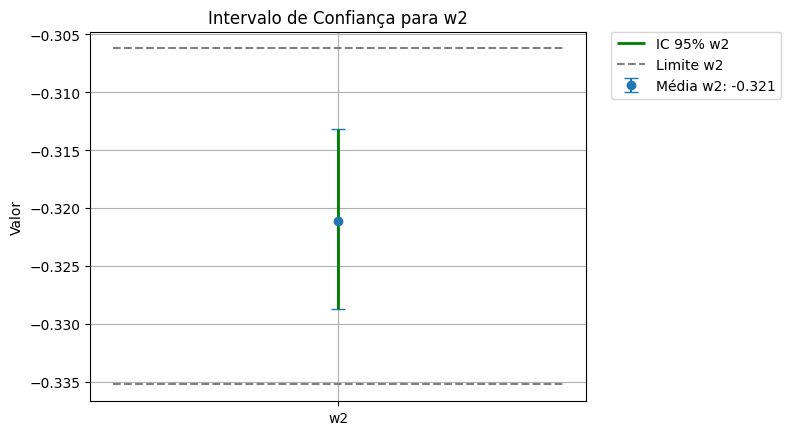

In [42]:
plt.errorbar(1, np.mean(w2), yerr=np.array([[np.mean(w2) - conf_interval_w2[0]], [conf_interval_w2[1] - np.mean(w2)]]),
             fmt='o', capsize=5, label=f'Média w2: {np.mean(w2):.3f}')
plt.vlines(1, conf_interval_w2[0], conf_interval_w2[1], color='green', linestyle='-', linewidth=2, label='IC 95% w2')
plt.hlines([w2_min, w2_max], xmin=0.8, xmax=1.2, colors='gray', linestyles='--', label='Limite w2')

plt.xticks([1], ['w2'])
plt.ylabel('Valor')
plt.title('Intervalo de Confiança para w2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
